# ANOVA and Chi Square 

### Practice Exercise 1

A company makes three types of electronic device.
Life time in hours for each type of electronic device is given below:

* life_type_A = [ 407, 411, 409 ]
* life_type_B = [ 404, 406, 408, 405, 402 ]
* ife_type_C  = [ 410, 408, 406, 408]

### Hint

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings("ignore")

In [2]:
life_type_A = np.array([407, 411, 409 ])
life_type_B = np.array([404, 406, 408, 405, 402 ])
life_type_C  = np.array([410, 408, 406, 408])

### a)  Plot box plot for the above data and write your inference on the group means from the boxplots.

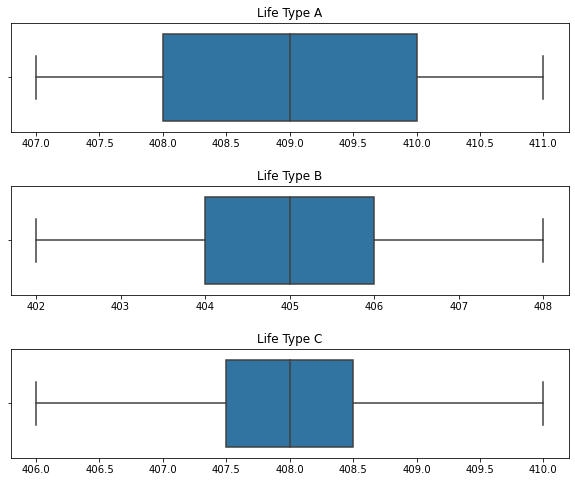

In [3]:
fig, axes = plt.subplots(3,1,figsize=(10,8))
fig.subplots_adjust(hspace=.5)
sns.boxplot(life_type_A,ax=axes[0]).set_title('Life Type A')
sns.boxplot(life_type_B,ax=axes[1]).set_title('Life Type B')
sns.boxplot(life_type_C,ax=axes[2]).set_title('Life Type C')
plt.show()

### b)  At 5% level of significance, is there any difference in the average lifetimes of the three types?

In [4]:
print(f_oneway(life_type_A,life_type_B,life_type_C))

F_onewayResult(statistic=4.5, pvalue=0.04419417382415922)


### c)  If  you were able to reject the null hypothesis, you can proceed with post-hoc analysis to determine which means are different 

In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.DataFrame()
df1  = pd.DataFrame({'life_type': 'A', 'life':life_type_A})
df2  = pd.DataFrame({'life_type': 'B', 'life':life_type_B})
df3  = pd.DataFrame({'life_type': 'C', 'life':life_type_C})
df = df.append(df1) 
df = df.append(df2) 
df = df.append(df3)

print(pairwise_tukeyhsd(df['life'], df['life_type'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     -4.0 0.0541 -8.0746 0.0746  False
     A      C     -1.0 0.7824 -5.2613 3.2613  False
     B      C      3.0 0.1177 -0.7427 6.7427  False
---------------------------------------------------


### Practice Exercise 2

### A sample of number of sell of a particular product over different days in different stores have been collected.Perform a test to check whether different stores and different days have any effect on the number of products that have been sold.

In [6]:
table1  = [['Day','Store-A','Store-B','Store-C','Store-D','Store-E'], [1,69, 71, 64, 67, 56],\
           [2, 68, 76, 79, 87, 76], [3, 71, 77, 74, 84, 72], [4, 70, 73, 71, 78, 73], [5, 60, 64, 67, 79, 58]]

In [7]:

headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1)

   Day  Store-A  Store-B  Store-C  Store-D  Store-E
0    1       69       71       64       67       56
1    2       68       76       79       87       76
2    3       71       77       74       84       72
3    4       70       73       71       78       73
4    5       60       64       67       79       58


In [8]:
f_oneway(df1['Store-A'],df1['Store-B'],df1['Store-C'],df1['Store-D'],df1['Store-E'])

F_onewayResult(statistic=2.565333333333334, pvalue=0.06981897863436556)

## Chi Square

### Practice Exercise 3

A1 airlines operated daily flights to several Indian cities. The operations manager believes that 28% of their passengers prefer vegan food, 42% prefer vegetarian food , 25% prefer non-veg food 5% request for Jain food. 

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

|               | Food type | Vegan | Vegetarian | Non-Vegetarian | Jain |
| ------------------------- | ---- | ---- | ----- | ---- | ---- |
|Number of passengers |  | 190 | 185 | 90 | 35 |

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

In [9]:
import scipy.stats as stats
import scipy

observed_values    = np.array([190, 185, 90, 35])
n                  = observed_values.sum()


In [10]:
expected_values    = np.array([n*0.3, n*.45, n*0.2, n*0.05])

print(stats.chisquare(observed_values, f_exp=expected_values))

Power_divergenceResult(statistic=22.77777777777778, pvalue=4.492718590376291e-05)


### Chi-square tests of independence

### Practice Exercise 4

A Cable service provider company is interested in checking whether or not the customer churn depends on customer segment.  Use 5% as level of significance

| Customer Segment | Churned | Retained |
|  -------- | ----- | ---- |
| S1 | 15 | 142 |
| S2 | 24 | 400 |
| S3 | 30 | 389 |


#### Hint

In [11]:
import numpy       as np
import scipy.stats as stats

churn_array = np.array([[15,142],[24, 400],[30, 389]])


In [12]:
print(stats.chi2_contingency(churn_array))

(2.779977047087869, 0.24907816314986156, 2, array([[ 10.833, 146.167],
       [ 29.256, 394.744],
       [ 28.911, 390.089]]))


## E N D  